In [1]:
#always going to import these libraries, regardless of whether they get used in each noteboo for continuty
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

sns.set_style("darkgrid")

In [2]:
#importing all of the csv and making sure it can be read 
attack_year = pd.read_csv('data/attack_by_year.csv', encoding= 'unicode_escape')
attack_year.columns = attack_year.columns.str.rstrip()

#attack by hemisphere csv imports
attack_hemisphere = pd.read_csv('data/attack_by_hemisphere.csv', encoding= 'unicode_escape')

#us_attacks csv import
us_attacks = pd.read_csv('data/us_attacks.csv', encoding = 'unicode_escape')


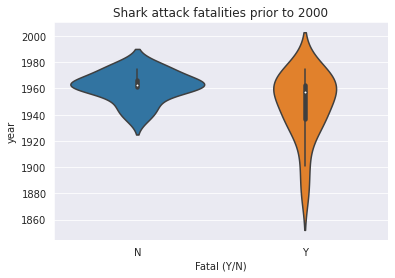

In [3]:
#convert year column to numeric for plotting
attack_year['year'] = pd.to_numeric(attack_year['year'])

#creating the first lineplot
# sns.lineplot(x='year', y='Fatal (Y/N)', data=attack_year)
"""this data is a bit skewed, so we're going to refine the attack_year data frame"""

#new dataframe that looks at attacks prior to 1980
df_before_1980 = attack_year[(attack_year["year"] < 1980) & (attack_year["Fatal (Y/N)"])]

#visualizing the attacks before 1980
attack_year_plot = sns.violinplot(x='Fatal (Y/N)', y='year', data=df_before_1980)
plt.title("Shark attack fatalities prior to 2000")
#saving as pic
attack_year_plot.figure.savefig("data/year_plot.png")

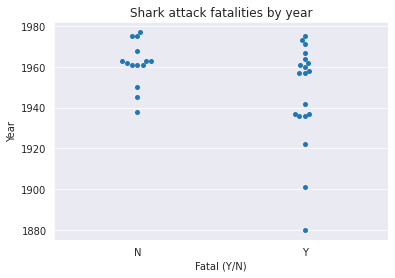

In [4]:
#visualizing a swarm plot to look at the fatality:year relationship and saving as pic
attack_year_swarm = sns.swarmplot(x='Fatal (Y/N)', y='year', data=df_before_1980)
plt.xlabel("Fatal (Y/N)")
plt.ylabel("Year")
plt.title("Shark attack fatalities by year")
attack_year_swarm.figure.savefig("data/year_swarm.png")

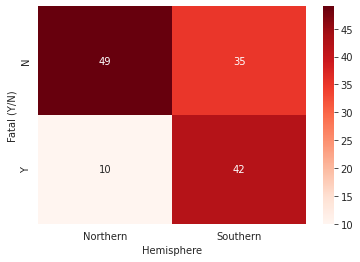

In [5]:
#creating a contingency table to visualize the attack:fatality ratio per hemisphere
contingency_table = pd.crosstab(attack_hemisphere['Fatal (Y/N)'], attack_hemisphere['Hemisphere'])

#visualizing the contingency table with a heatmap
attack_hemisphere_table = sns.heatmap(contingency_table, annot=True, cmap='Reds')

#saving as pic
attack_hemisphere_table.figure.savefig("data/hemisphere_heatmap.png")

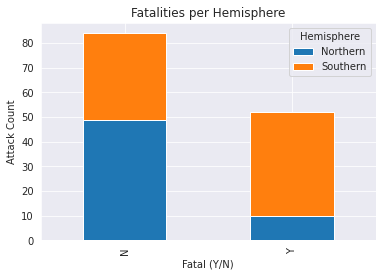

In [6]:
#visualizing the contingency table with a stacked bar graph and saving as pic
attack_hemisphere_bar = contingency_table.plot(kind="bar", stacked=True)
plt.xlabel("Fatal (Y/N)")
plt.ylabel("Attack Count")
plt.title("Fatalities per Hemisphere")
attack_hemisphere_bar.figure.savefig("data/hemisphere_bar.png")

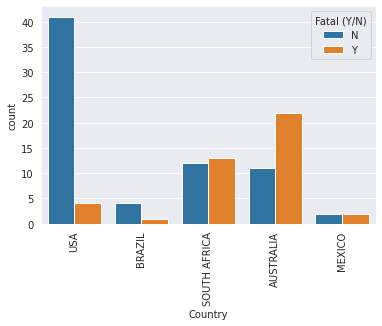

In [7]:
#Looking at the worst countries for shark attacks
dangerous_countries = attack_hemisphere['Country'].value_counts().head(5).index
df_dangerous_countries = attack_hemisphere[attack_hemisphere['Country'].isin(dangerous_countries)]

#plotting the most dangerous countries to swim in
dangrous_waters = sns.countplot(x='Country', hue='Fatal (Y/N)', data=df_dangerous_countries)
plt.xticks(rotation=90)

#saving as pic
dangrous_waters.figure.savefig("data/dangerous_waters.png",  dpi=300, bbox_inches='tight')

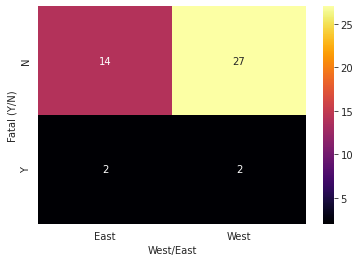

In [8]:
#creating a contingency table to look at the ration of fatalities:location in the USA
us_attack_table = pd.crosstab(us_attacks['Fatal (Y/N)'], us_attacks['West/East'])

#visualizing the contingency table
us_attack_heatmap = sns.heatmap(us_attack_table, annot=True, cmap='inferno')

#saving file as pic to use in analysis
us_attack_heatmap.figure.savefig("data/us_attack_heatmap.png")

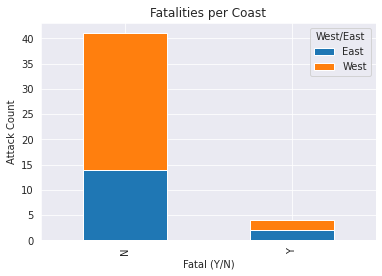

In [10]:
#visualizing the us attacks table with a stacked bar graph and saving as pic
us_attack_bar = us_attack_table.plot(kind="bar", stacked=True)
plt.xlabel("Fatal (Y/N)")
plt.ylabel("Attack Count")
plt.title("Fatalities per Coast")
us_attack_bar.figure.savefig("data/us_attack_bar.png")